## **1. Importing Libraries**

numpy: For numerical operations.

pandas: For data manipulation and analysis.

matplotlib.pyplot: For data visualization.

keras.models.load_model: For loading pre-trained Keras models.

datetime: For handling date and time.

yfinance: For downloading stock data from Yahoo Finance.

tensorflow: For building and training deep learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import datetime as dt
import yfinance as yf
import tensorflow as tf

2024-04-03 20:55:26.578762: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 20:55:26.580645: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 20:55:26.670708: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 20:55:27.056477: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 20:55:28.875657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## **2. Downloading Stock Data**


STOCK: Ticker symbol of the stock (State Bank of India in this case).

start_date: Starting date for the stock data.

end_date: Ending date for the stock data.

yf.download: Downloads historical stock data from Yahoo Finance.

df.head(): Displays the first five rows of the DataFrame.

In [2]:
STOCK = 'SBIN.NS'
start_date = dt.date(2000,1,1)
end_date = dt.datetime.now().date()
df = yf.download(STOCK,start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,22.267092,22.988886,22.101974,22.988886,16.110510,25152894
2000-01-04,22.988886,24.720245,22.535995,24.446625,17.132084,47648560
2000-01-05,23.493668,24.974997,23.116261,23.441774,16.427891,36396207
2000-01-06,23.776726,25.286358,23.776726,24.625893,17.257715,70573968
2000-01-07,24.673071,26.409147,24.059780,25.786425,18.071018,83453217


## **3. Calculating Moving Averages**

rolling(100).mean(): Calculates the 100-day moving average.

rolling(200).mean(): Calculates the 200-day moving average.

In [3]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2024-03-26    655.659002
2024-03-27    657.340002
2024-03-28    659.208002
2024-04-01    661.127001
2024-04-02    663.070002
Name: Close, Length: 6053, dtype: float64

In [4]:
ma200=df.Close.rolling(200).mean()
ma200

Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2024-03-26    619.333001
2024-03-27    620.063501
2024-03-28    620.898501
2024-04-01    621.744001
2024-04-02    622.633501
Name: Close, Length: 6053, dtype: float64

## **4. Plotting Stock Data and Moving Averages**

plt.plot(df.Close): Plots the closing prices of the stock.

plt.plot(ma100, 'r'): Plots the 100-day moving average in red.

plt.plot(ma200, 'g'): Plots the 200-day moving average in green.

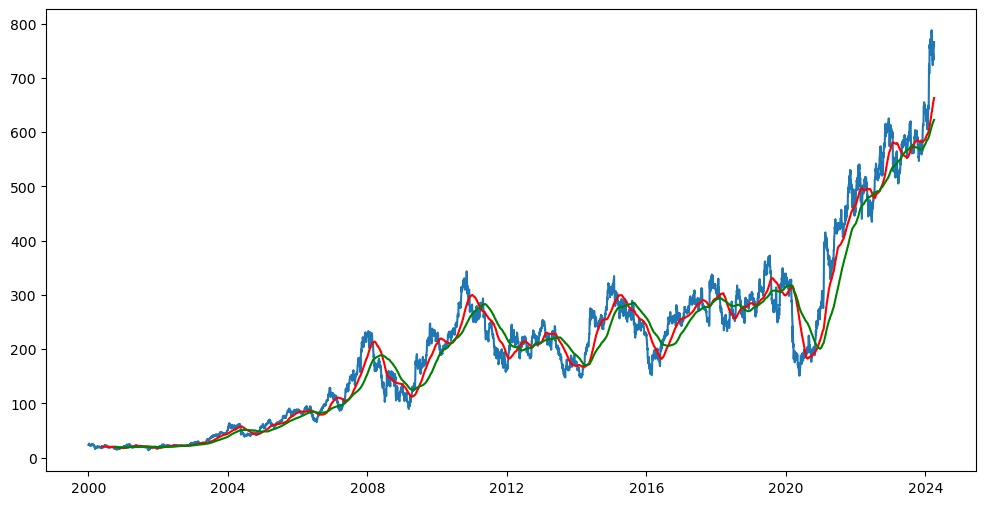

In [5]:
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [6]:
df.shape

(6053, 6)

## **5. Splitting Data into Training and Testing**

data_training: DataFrame containing 70% of the data for training.

data_testing: DataFrame containing the remaining 30% of the data for testing.

In [7]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4237, 1)
(1816, 1)


## **6. Scaling Data**

MinMaxScaler: Scales data to a specified range (0 to 1 in this case).

fit_transform: Fits the scaler to the data and transforms it.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02922066],
       [0.03363806],
       [0.03059305],
       ...,
       [0.74334761],
       [0.7527416 ],
       [0.75031738]])

## **7. Creating Training Data**

x_train: List of sequences of 100 data points for each input sample.

y_train: List of corresponding labels for each input sample.

In [10]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape

(4137, 100, 1)

## **8. Building the LSTM Model**

Sequential(): Initializes the sequential model.

LSTM(units=50, ...): Adds LSTM layers with specified units.

Dropout(0.2): Adds dropout layers to prevent overfitting.

Dense(units=1): Adds a dense layer with 1 unit.

model.summary(): Prints the model architecture.

In [12]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [13]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/home/rohit/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

## **9. Compiling and Training the Model**

compile: Compiles the model with the Adam optimizer and mean squared error loss function.

fit: Trains the model on the training data for 50 epochs.

save: Saves the trained model to a file.

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - loss: 0.0551
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - loss: 0.0072
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - loss: 0.0060
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 181ms/step - loss: 0.0060
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - loss: 0.0052
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - loss: 0.0052
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - loss: 0.0046
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - loss: 0.0048
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - loss: 0.0042
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - loss: 0.0038
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.0039
Epoch 12/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - loss: 0.0037
Epoch 13/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - loss: 0.0034
Epoch 14/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - loss: 0.0034
Epoch 15/50
130/1

In [17]:
model.save('keras_model.h5')

## **10. Preparing Testing Data**

past_100_days: Last 100 days of the training data.

final_df: Concatenation of the last 100 days of training data and the testing data.

input_data: Scales the concatenated data.

In [18]:
data_testing.head()

,Close
Date,
2016-11-28,253.550003
2016-11-29,252.699997
2016-11-30,258.350006
2016-12-01,255.649994
2016-12-02,254.100006


In [19]:
data_training.tail(100)

,Close
Date,
2016-06-29,217.199997
2016-06-30,218.800003
2016-07-01,219.600006
2016-07-04,223.000000
2016-07-05,223.500000
...,...
2016-11-21,257.350006
2016-11-22,257.350006
2016-11-23,258.649994


In [20]:
past_100_days = data_training.tail(100)

In [21]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [22]:
final_df.head()

,Close
0,217.199997
1,218.800003
2,219.600006
3,223.000000
4,223.500000


In [23]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10412742],
       [0.10663842],
       [0.10789391],
       ...,
       [0.94397361],
       [0.95331136],
       [0.96602328]])

In [24]:
input_data.shape

(1916, 1)

## **11. Creating Testing Data**

x_test: List of sequences of 100 data points for each input sample.

y_test: List of corresponding labels for each input sample.

In [25]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1816, 100, 1)
(1816,)


## **12. Making Predictions**

predict: Predicts the stock prices using the trained model.

In [26]:
y_predicted = model.predict(x_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [27]:
y_predicted.shape

(1816, 1)

In [28]:
y_predicted

array([[0.2669199 ],
       [0.26695657],
       [0.2664377 ],
       ...,
       [0.8737105 ],
       [0.8745034 ],
       [0.8779336 ]], dtype=float32)

In [29]:
y_test

array([0.16117389, 0.15983991, 0.16870685, ..., 0.94397361, 0.95331136,
       0.96602328])

## **13. Inversing Scaling and Plotting Predictions**

scale_factor: Factor used to inverse the scaling.

plt.plot: Plots the original and predicted prices.

plt.legend: Adds a legend to the plot.

plt.title: Adds a title to the plot.

plt.xlabel: Adds a label to the x-axis.

plt.ylabel: Adds a label to the y-axis.

plt.show(): Displays the plot.

In [30]:
scaler.scale_

array([0.00156937])

In [31]:
scale_factor = 1/0.00107175
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

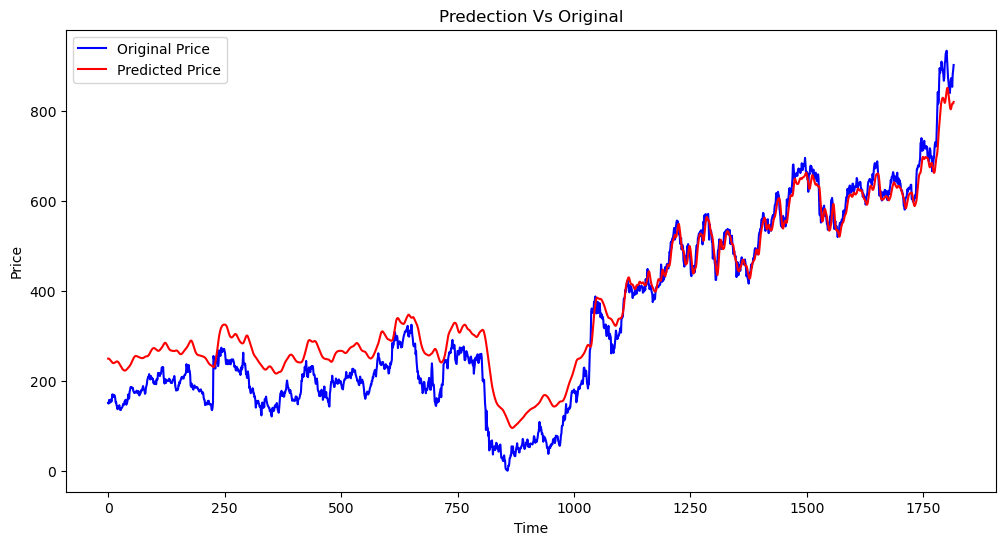

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b')
plt.plot(y_predicted, 'r')
plt.legend(['Original Price', 'Predicted Price'])
plt.title("Predection Vs Original")
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()